### load libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import plotly.graph_objs as go

### get the Taste Profile subset from the Million Song Dataset (MSD) online

Source: http://millionsongdataset.com/tasteprofile/

(scroll down and use the link for TRIPLETS FOR 1M USERS)

Note: you used to be able to get this data via the Echo Nest API, however that no longer works since they got acquired by Spotify....

### unzip the downloaded .txt file into THIS directory so we can load it with PANDAS

In [3]:
taste_df = pd.read_csv('train_triplets.txt', sep='\t', header=None, names=['userID', 'songID', 'playcount'])
taste_df.head()

,userID,songID,playcount
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [4]:
print(len(taste_df), 'rows') #sanity check #rows, should be 48,373,586 according to the website
print(len(taste_df['songID'].unique()), 'unique songs') #should be 384,546

48373586 rows
384546 unique songs


### let's get the song title and artist name for each song ID

Source: http://millionsongdataset.com/pages/getting-dataset/ (scroll down to Additional Files, #1: List of all track Echo Nest ID)

Save this .txt file in the current directory as well

In [5]:
tracks_df = pd.read_csv('unique_tracks.txt', sep='<SEP>', header=None, names=['trackID', 'songID', 'artist', 'title'])
tracks_df.head()

C:\Users\sophi\AppData\Local\Temp\ipykernel_5360\4145821792.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tracks_df = pd.read_csv('unique_tracks.txt', sep='<SEP>', header=None, names=['trackID', 'songID', 'artist', 'title'])


,trackID,songID,artist,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
print(len(tracks_df), 'rows') #should be 1 mill

1000000 rows


Note: the way this data is structured, a "track" is the unique instance/recording of a song. Thus one "song" can have multiple tracks (recordings) associated with it. For the purposes of this analysis, we only want to keep the unique SONGS.

Find and remove duplicate songs:

In [8]:
unique_songs_df = tracks_df[np.logical_not(tracks_df.duplicated(subset=['songID'], keep='first'))]
unique_songs_df.reset_index(inplace=True, drop=True)
unique_songs_df.head()

,trackID,songID,artist,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [9]:
unique_songs_df.duplicated(subset=['songID']).sum() #check that this worked

0

### merge dataframes

Add the trackID, artist, and title for each entry in the taste dataframe

In [10]:
taste_df_merged = taste_df.merge(unique_songs_df, how='left', on='songID')
taste_df_merged.head()

,userID,songID,playcount,trackID,artist,title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,TRAHZNE128F9341B86,The Dead 60s,Riot Radio (Soundtrack Version)


In [11]:
#sanity check: the dimensions of merged dataframe should be the same as the original taste dataframe
print(len(taste_df_merged), 'rows')
print(len(taste_df_merged['songID'].unique()), 'unique songs')
print(len(taste_df_merged['trackID'].unique()), 'unique tracks')

48373586 rows
384546 unique songs
384546 unique tracks


### check for missing values?

In [12]:
taste_df_merged.isna().values.any() #do we have any missing values?

True

In [13]:
#where? which column?
for i in range(0,6):
    print('NAs in col ', i, '?: ', taste_df_merged.iloc[:,i].isna().values.any())

NAs in col  0 ?:  False
NAs in col  1 ?:  False
NAs in col  2 ?:  False
NAs in col  3 ?:  False
NAs in col  4 ?:  False
NAs in col  5 ?:  True


Text(0.5, 1.0, 'Visualize missing data from MSD')

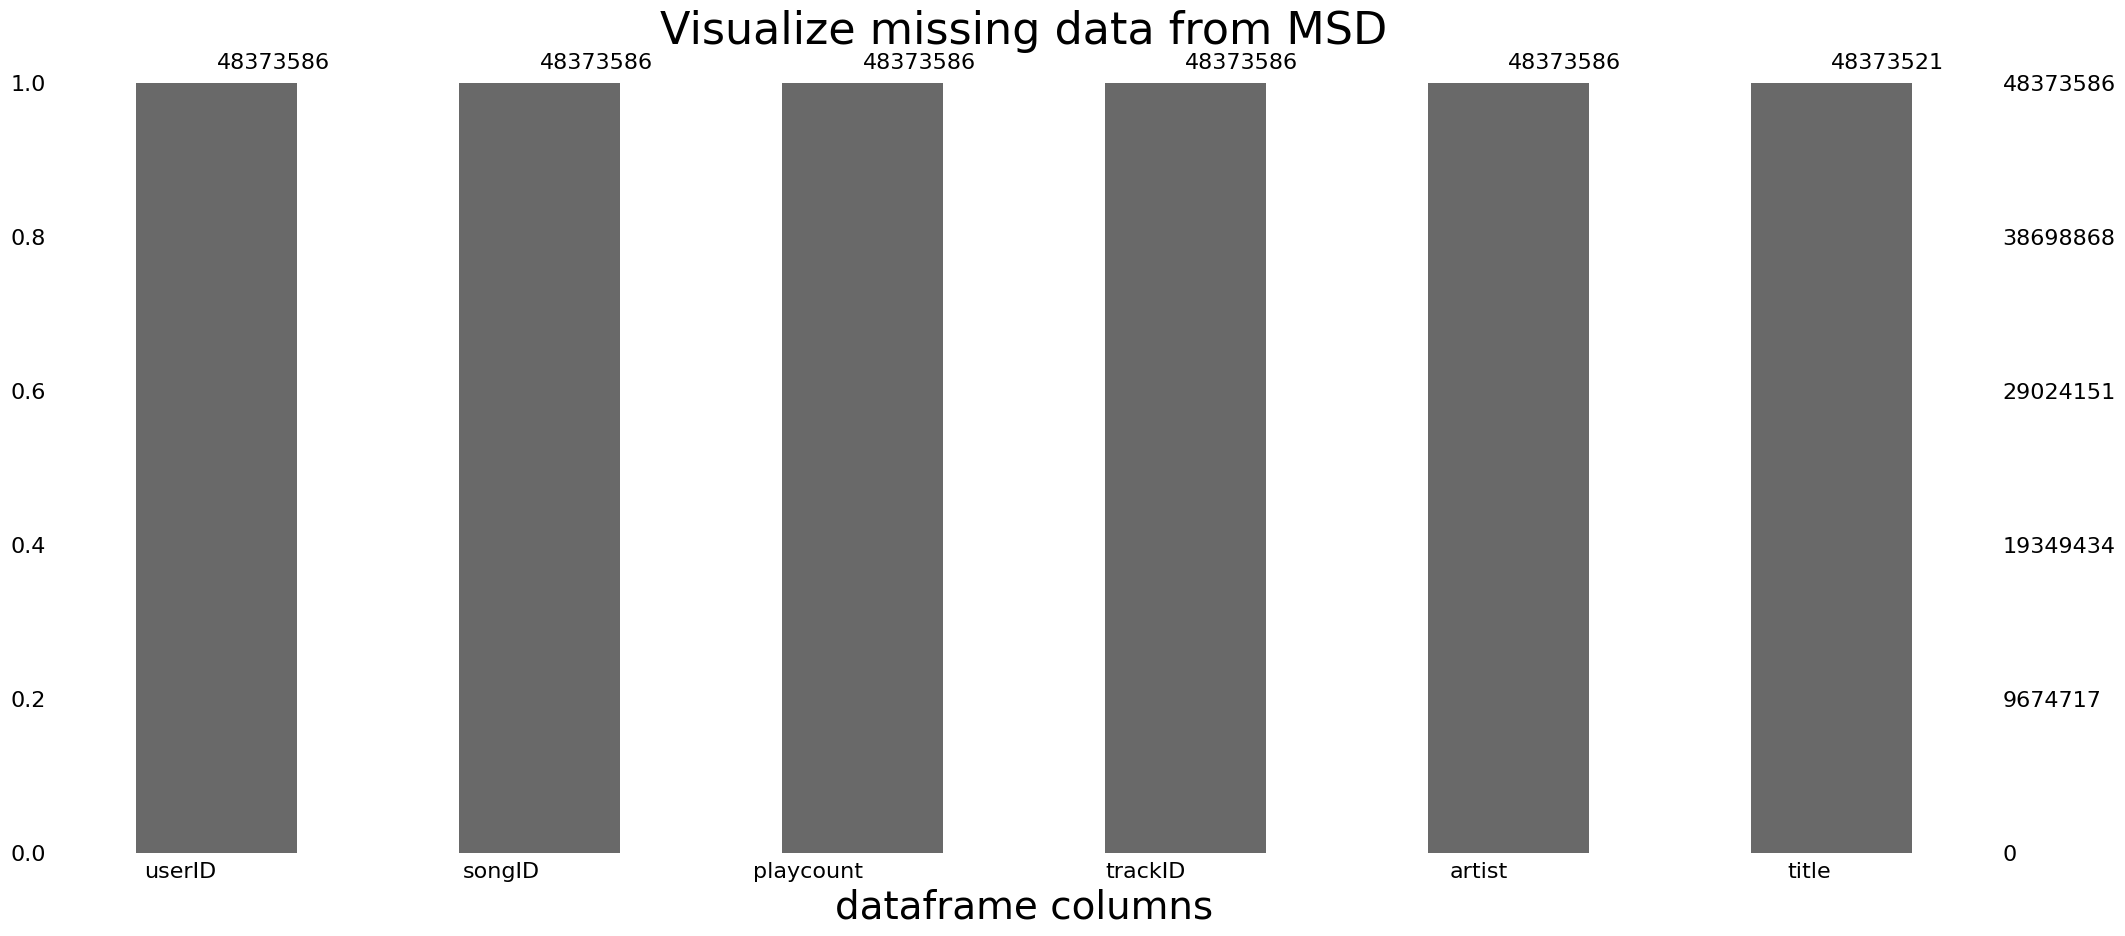

In [14]:
#lets visualize this
plot = msno.bar(taste_df_merged, label_rotation=0)
plot.set_xlabel('dataframe columns', fontsize=28)
plot.set_title('Visualize missing data from MSD', fontsize=32)

what songs/tracks/artists are affected?

In [15]:
taste_df_merged['songID'][taste_df_merged.iloc[:,5].isna()].unique()

array(['SOZDBDL12AB018AFFF', 'SOLDTFD12AB018AFE6', 'SOFDILP12AC960A4EF',
       'SOECGBQ12AB018D582'], dtype=object)

In [16]:
taste_df_merged['trackID'][taste_df_merged.iloc[:,5].isna()].unique()

array(['TROFVVS12903CDCA87', 'TRBXMXG12903CDCA7F', 'TRJOMUD12903CED473',
       'TRLKLLK12903CDCAA2'], dtype=object)

In [17]:
taste_df_merged['artist'][taste_df_merged.iloc[:,5].isna()].unique()

array(['Sébastien Roch', 'Fobia'], dtype=object)

seems like the problem stems from 4 songs / 2 artists. since this is an extremely small amount of data compared to what we have (65 rows vs. 48+ mill) let's remove these rows from the dataset so that what we have left is all equivalent amounts of information.

In [19]:
taste_df_cleaned = taste_df_merged.dropna()
taste_df_cleaned.reset_index(inplace=True, drop=True)
taste_df_cleaned

,userID,songID,playcount,trackID,artist,title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,TRAHZNE128F9341B86,The Dead 60s,Riot Radio (Soundtrack Version)
...,...,...,...,...,...,...
48373516,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2,TRKUAEO128F933ABFC,Eminem / Obie Trice / Stat Quo / Bobby Creekwa...,We're Back
48373517,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1,TRRNFHH128F92D262D,Rise Against,Savior
48373518,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1,TRSLDDC12903CC36E7,Usher featuring will.i.am,OMG
48373519,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3,TRNJQAM128F14557AF,matchbox twenty,Downfall (Album Version)


### checkpoint: save the merged dataset

In [ ]:
taste_df_cleaned.to_csv('taste_profiles.csv')

### exploration: what does the dataset look like so far?